<a href="https://colab.research.google.com/github/soil7/ICS-Assignment-1/blob/main/Copy_of_ICS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: 1. Dataset:
# Use the Breast Cancer dataset provided by sklearn. It includes 30 features and a binary
# classification task (malignant vs. benign).
# 2. Tasks:
# Data Preprocessing:
# - Load the Breast Cancer dataset using load_breast_cancer from sklearn.
# - Partition the data into an 80% training set and a 20% test set.
# - Scale the features using StandardScaler for KNN.
# ```
# # This is formatted as code
# ```

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target
print(X.shape)
print(cancer.feature_names)
print(y.shape)
print(y)
print(cancer.target_names)
print(cancer)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)



(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 

In [1]:
#1. Import Required Libraries
#load breast cancer data
from sklearn.datasets import load_breast_cancer
# to improve the model efficiency and generalisation, split the data for train and test
from sklearn.model_selection import train_test_split
# to hormonize the data all the numeric values are scaled to mean 0 and standard deviaiton or variance 1
from sklearn.preprocessing import StandardScaler
#for numerical calcualtions
import numpy as np
import pandas as pd

2. #  importing the dataset and giving a new name
ics = load_breast_cancer()
features = pd.DataFrame(ics.data, columns=ics.feature_names)
labels = pd.Series(ics.target)
# dividing the datset into tranin and split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)
# check if th data is divided in corret number of rows
print(f"Training Set: {features_train.shape}, {labels_train.shape}")
print(f"Test Set: {features_test.shape}, {labels_test.shape}")


Training Set: (455, 30), (455,)
Test Set: (114, 30), (114,)


In [2]:
# StandardScale object is created
scale = StandardScaler()
# Transforming the train features
features_train_scaled = scale.fit_transform(features_train)
# Transforming the test features
features_test_scaled = scale.transform(features_test)

3. #Model Training:
#Train three classifiers:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Starting KNN  with 5 neighbors
model_knn = KNeighborsClassifier(n_neighbors=9)
# Training the KNN model1 with the scaled training data
model_knn.fit(features_train_scaled, labels_train)
#prediciting on the test data
pred_knn = model_knn.predict(features_test_scaled)
#  evaluation
accuracy = accuracy_score(labels_test, pred_knn)
precision = precision_score(labels_test, pred_knn)
recall = recall_score(labels_test, pred_knn)
f1 = f1_score(labels_test, pred_knn)
conf_matrix = confusion_matrix(labels_test, pred_knn)
#results
print("K-Nearest Neighbors (KNN) Model Performance:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print("Confusion Matrix:")
print(conf_matrix)

K-Nearest Neighbors (KNN) Model Performance:
Accuracy: 0.965
Precision: 0.972
Recall: 0.972
F1-score: 0.972
Confusion Matrix:
[[41  2]
 [ 2 69]]


In [4]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree classifier (default settings)
model_dt_default = DecisionTreeClassifier(max_depth=5)
# Training the Decision Tree model with scaled training data
model_dt_default.fit(features_train_scaled, labels_train)
#prediciting on the test data
predict_dt_default = model_dt_default.predict(features_test_scaled)
# Evaluate
accuracy_model_dt_default = accuracy_score(labels_test, predict_dt_default)
precision_model_dt_default = precision_score(labels_test, predict_dt_default)
recall_model_dt_default = recall_score(labels_test, predict_dt_default)
f1_model_dt_default = f1_score(labels_test, predict_dt_default)
conf_matrix_model_dt_default = confusion_matrix(labels_test, predict_dt_default)
# Results
print("Decision Tree Model Performance :")
print(f"Accuracy: {accuracy_model_dt_default:.3f}")
print(f"Precision: {precision_model_dt_default:.3f}")
print(f"Recall: {recall_model_dt_default:.3f}")
print(f"F1-score: {f1_model_dt_default:.3f}")
print("Confusion Matrix:")
print(conf_matrix_model_dt_default)

Decision Tree Model Performance :
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1-score: 0.958
Confusion Matrix:
[[40  3]
 [ 3 68]]


In [5]:
from sklearn.ensemble import RandomForestClassifier
#  Random Forest classifier
model_rf_default = RandomForestClassifier(n_estimators=60)
# Training the model with the scaled training data
model_rf_default.fit(features_train_scaled, labels_train)
# Predicitng on the test data
predict_rf_default = model_rf_default.predict(features_test_scaled)
# Evaluate
accuracy_model_rf_default= accuracy_score(labels_test, predict_rf_default)
precision_model_rf_default = precision_score(labels_test, predict_rf_default)
recall_model_rf_default = recall_score(labels_test, predict_rf_default)
f1__model_rf_default = f1_score(labels_test, predict_rf_default)
conf_matrix_model_rf_default = confusion_matrix(labels_test, predict_rf_default)
# Results
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_model_rf_default:.3f}")
print(f"Precision: {precision_model_rf_default:.3f}")
print(f"Recall: {recall_model_rf_default:.3f}")
print(f"F1-score: {f1__model_rf_default:.3f}")
print("Confusion Matrix:")
print(conf_matrix_model_rf_default)


Random Forest Model Performance:
Accuracy: 0.965
Precision: 0.959
Recall: 0.986
F1-score: 0.972
Confusion Matrix:
[[40  3]
 [ 1 70]]


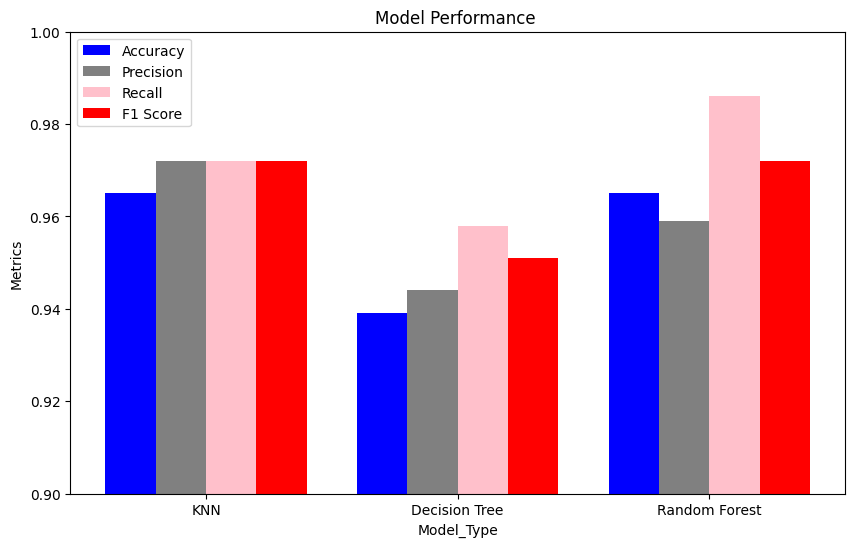

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# For high level of interface
import seaborn as sns

# Model names
Model_Type = ["KNN", "Decision Tree", "Random Forest"]

# Performance metrics
Accuracy = [0.965, 0.939, 0.965]
Precision = [0.972, 0.944, 0.959]
Recall = [0.972, 0.958, 0.986]
F1_score_values = [0.972, 0.951, 0.972]

# Size of figure
plt.figure(figsize=(10, 6))

# Bar positions
x = np.arange(len(Model_Type))

# Plot bars for each metric
plt.bar(x - 0.2*1.5, Accuracy, width=0.2, label="Accuracy", color="blue")
plt.bar(x - 0.2/2, Precision, width=0.2, label="Precision", color="GREY")
plt.bar(x + 0.2/2, Recall, width=0.2, label="Recall", color="pink")
plt.bar(x + 0.2*1.5, F1_score_values, width=0.2, label="F1 Score", color="red")

# Add labels and title
plt.xlabel("Model_Type")
plt.ylabel("Metrics")
plt.title("Model Performance ")
plt.xticks(ticks=x, labels=Model_Type)
plt.ylim(0.9, 1.0)  # Set y-axis limit for better visibility
plt.legend()

# Show plot
plt.show()

In [7]:
3. #Model Training:
#Train three classifiers:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Starting KNN  with 5 neighbors

# List of different k values to evaluate
k_values = [3,5, 6, 7, 9]
results = []

# Loop through each k value
for k in k_values:
    # # Starting KNN  with different neighbors
    model_knn = KNeighborsClassifier(n_neighbors=k)

# Training the KNN model1 with the scaled training data
    model_knn.fit(features_train_scaled, labels_train)

#prediciting on the test data
    pred_knn = model_knn.predict(features_test_scaled)

# evaluation
    accuracy = accuracy_score(labels_test, pred_knn)
    precision = precision_score(labels_test, pred_knn)
    recall = recall_score(labels_test, pred_knn)
    f1 = f1_score(labels_test, pred_knn)
    conf_matrix = confusion_matrix(labels_test, pred_knn)

    # Extracting results in a dictionary
    results.append({
        'k': k,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': conf_matrix
    })

#results
for result in results:
    print(f"\nK-Nearest Neighbors (KNN) Model Performance (k={result['k']}):")
    print(f"Accuracy: {result['Accuracy']:.3f}")
    print(f"Precision: {result['Precision']:.3f}")
    print(f"Recall: {result['Recall']:.3f}")
    print(f"F1-Score: {result['F1-Score']:.3f}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])


K-Nearest Neighbors (KNN) Model Performance (k=3):
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1-Score: 0.958
Confusion Matrix:
[[40  3]
 [ 3 68]]

K-Nearest Neighbors (KNN) Model Performance (k=5):
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1-Score: 0.958
Confusion Matrix:
[[40  3]
 [ 3 68]]

K-Nearest Neighbors (KNN) Model Performance (k=6):
Accuracy: 0.956
Precision: 0.971
Recall: 0.958
F1-Score: 0.965
Confusion Matrix:
[[41  2]
 [ 3 68]]

K-Nearest Neighbors (KNN) Model Performance (k=7):
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1-Score: 0.958
Confusion Matrix:
[[40  3]
 [ 3 68]]

K-Nearest Neighbors (KNN) Model Performance (k=9):
Accuracy: 0.965
Precision: 0.972
Recall: 0.972
F1-Score: 0.972
Confusion Matrix:
[[41  2]
 [ 2 69]]


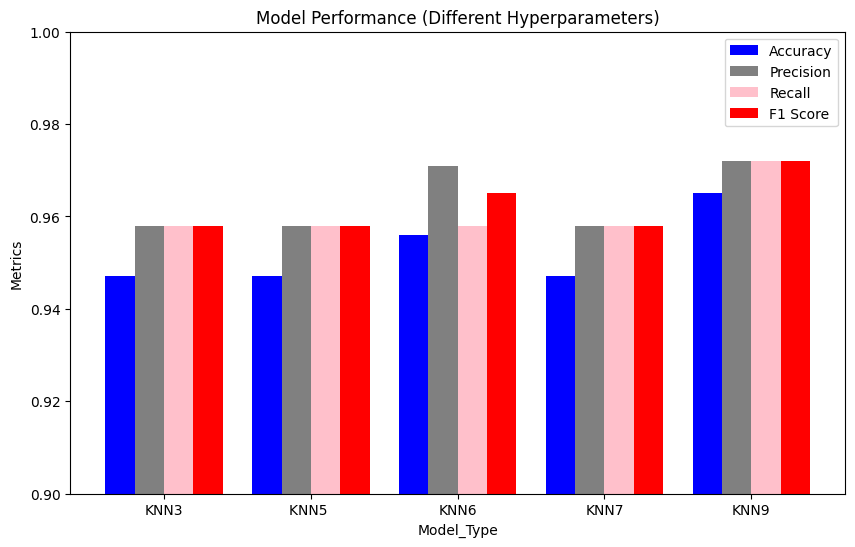

In [8]:
# Model names
Model_Type = ["KNN3", "KNN5 ", "KNN6", "KNN7", "KNN9"]

# Performance metrics
Accuracy = [0.947, 0.947, 0.956, 0.947, 0.965]
Precision = [0.958, 0.958, 0.971, 0.958, 0.972]
Recall = [0.958, 0.958, 0.958, 0.958, 0.972]
F1_score_values = [0.958, 0.958, 0.965, 0.958, 0.972]

# Size of figure
plt.figure(figsize=(10, 6))

# Bar positions
x = np.arange(len(Model_Type))

# Plot bars for each metric
plt.bar(x - 0.2*1.5, Accuracy, width=0.2, label="Accuracy", color="blue")
plt.bar(x - 0.2/2, Precision, width=0.2, label="Precision", color="GREY")
plt.bar(x + 0.2/2, Recall, width=0.2, label="Recall", color="pink")
plt.bar(x + 0.2*1.5, F1_score_values, width=0.2, label="F1 Score", color="red")

# Add labels and title
plt.xlabel("Model_Type")
plt.ylabel("Metrics")
plt.title("Model Performance (Different Hyperparameters)")
plt.xticks(ticks=x, labels=Model_Type)
plt.ylim(0.9, 1.0)  # Set y-axis limit for better visibility
plt.legend()

# Show plot
plt.show()

In [9]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree classifier (different depths)
depth_values = [ 1, 3, 5, 7]

# Loop through different values
for depth in depth_values:
     model_dt_default = DecisionTreeClassifier(max_depth=depth)
# Training the Decision Tree model with scaled training data
     model_dt_default.fit(features_train_scaled, labels_train)
#prediciting on the test data
     predict_dt_default = model_dt_default.predict(features_test_scaled)
# Evaluate
     accuracy_model_dt_default = accuracy_score(labels_test, predict_dt_default)
     precision_model_dt_default = precision_score(labels_test, predict_dt_default)
     recall_model_dt_default = recall_score(labels_test, predict_dt_default)
     f1_model_dt_default = f1_score(labels_test, predict_dt_default)
     conf_matrix_model_dt_default = confusion_matrix(labels_test, predict_dt_default)

# Results
     print(f"\nDecision Tree Model Performance (max_depth={depth}):")
     print(f"Accuracy: {accuracy_model_dt_default:.3f}")
     print(f"Precision: {precision_model_dt_default:.3f}")
     print(f"Recall: {recall_model_dt_default:.3f}")
     print(f"F1-Score: {f1_model_dt_default:.3f}")
     print("Confusion Matrix:")
     print(conf_matrix_model_dt_default)



Decision Tree Model Performance (max_depth=1):
Accuracy: 0.895
Precision: 0.940
Recall: 0.887
F1-Score: 0.913
Confusion Matrix:
[[39  4]
 [ 8 63]]

Decision Tree Model Performance (max_depth=3):
Accuracy: 0.939
Precision: 0.944
Recall: 0.958
F1-Score: 0.951
Confusion Matrix:
[[39  4]
 [ 3 68]]

Decision Tree Model Performance (max_depth=5):
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1-Score: 0.958
Confusion Matrix:
[[40  3]
 [ 3 68]]

Decision Tree Model Performance (max_depth=7):
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1-Score: 0.958
Confusion Matrix:
[[40  3]
 [ 3 68]]


In [10]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree classifier (default settings)
model_dt_default = DecisionTreeClassifier()
# Training the Decision Tree model with scaled training data
model_dt_default.fit(features_train_scaled, labels_train)
#prediciting on the test data
predict_dt_default = model_dt_default.predict(features_test_scaled)
# Evaluate
accuracy_model_dt_default = accuracy_score(labels_test, predict_dt_default)
precision_model_dt_default = precision_score(labels_test, predict_dt_default)
recall_model_dt_default = recall_score(labels_test, predict_dt_default)
f1_model_dt_default = f1_score(labels_test, predict_dt_default)
conf_matrix_model_dt_default = confusion_matrix(labels_test, predict_dt_default)
# Results
print("Decision Tree Model Performance (Default Settings):")
print(f"Accuracy: {accuracy_model_dt_default:.3f}")
print(f"Precision: {precision_model_dt_default:.3f}")
print(f"Recall: {recall_model_dt_default:.3f}")
print(f"F1-score: {f1_model_dt_default:.3f}")
print("Confusion Matrix:")
print(conf_matrix_model_dt_default)

Decision Tree Model Performance (Default Settings):
Accuracy: 0.921
Precision: 0.943
Recall: 0.930
F1-score: 0.936
Confusion Matrix:
[[39  4]
 [ 5 66]]


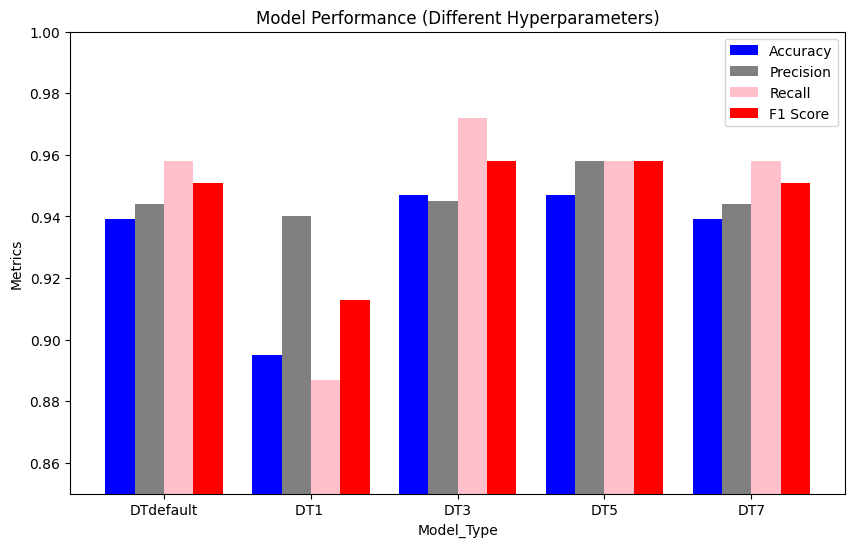

In [11]:
# Model names
Model_Type = ["DTdefault", "DT1 ", "DT3", "DT5", "DT7"]

# Performance metrics
Accuracy = [0.939, 0.895, 0.947, 0.947, 0.939]
Precision = [0.944, 0.940, 0.945, 0.958, 0.944]
Recall = [0.958, 0.887, 0.972, 0.958, 0.958]
F1_score_values = [0.951, 0.913, 0.958, 0.958, 0.951]

# Size of figure
plt.figure(figsize=(10, 6))

# Bar positions
x = np.arange(len(Model_Type))

# Plot bars for each metric
plt.bar(x - 0.2*1.5, Accuracy, width=0.2, label="Accuracy", color="blue")
plt.bar(x - 0.2/2, Precision, width=0.2, label="Precision", color="GREY")
plt.bar(x + 0.2/2, Recall, width=0.2, label="Recall", color="pink")
plt.bar(x + 0.2*1.5, F1_score_values, width=0.2, label="F1 Score", color="red")

# Add labels and title
plt.xlabel("Model_Type")
plt.ylabel("Metrics")
plt.title("Model Performance (Different Hyperparameters)")
plt.xticks(ticks=x, labels=Model_Type)
plt.ylim(0.85, 1.0)  # Set y-axis limit for better visibility
plt.legend()

# Show plot
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
# Random forest classifier (different depths)
estimator_values = [10, 60, 100, 125, 160]
# Loop through different values
for n_trees in estimator_values:
#  Random Forest classifier
    model_rf_default = RandomForestClassifier(n_estimators= n_trees, random_state= 40)
# Training the model with the scaled training data
    model_rf_default.fit(features_train_scaled, labels_train)
# Predicitng on the test data
    predict_rf_default = model_rf_default.predict(features_test_scaled)
# Evaluate
    accuracy_model_rf_default= accuracy_score(labels_test, predict_rf_default)
    precision_model_rf_default = precision_score(labels_test, predict_rf_default)
    recall_model_rf_default = recall_score(labels_test, predict_rf_default)
    f1__model_rf_default = f1_score(labels_test, predict_rf_default)
    conf_matrix_model_rf_default = confusion_matrix(labels_test, predict_rf_default)
# Results
    print(f"\nRandom Forest Model Performance (n_estimators={n_trees}):")
    print(f"Accuracy: {accuracy_model_rf_default:.3f}")
    print(f"Precision: {precision_model_rf_default:.3f}")
    print(f"Recall: {recall_model_rf_default:.3f}")
    print(f"F1-Score: {f1__model_rf_default:.3f}")
    print("Confusion Matrix:")
    print(conf_matrix_model_rf_default)


Random Forest Model Performance (n_estimators=10):
Accuracy: 0.965
Precision: 0.959
Recall: 0.986
F1-Score: 0.972
Confusion Matrix:
[[40  3]
 [ 1 70]]

Random Forest Model Performance (n_estimators=60):
Accuracy: 0.965
Precision: 0.959
Recall: 0.986
F1-Score: 0.972
Confusion Matrix:
[[40  3]
 [ 1 70]]

Random Forest Model Performance (n_estimators=100):
Accuracy: 0.965
Precision: 0.959
Recall: 0.986
F1-Score: 0.972
Confusion Matrix:
[[40  3]
 [ 1 70]]

Random Forest Model Performance (n_estimators=125):
Accuracy: 0.965
Precision: 0.959
Recall: 0.986
F1-Score: 0.972
Confusion Matrix:
[[40  3]
 [ 1 70]]

Random Forest Model Performance (n_estimators=160):
Accuracy: 0.965
Precision: 0.959
Recall: 0.986
F1-Score: 0.972
Confusion Matrix:
[[40  3]
 [ 1 70]]


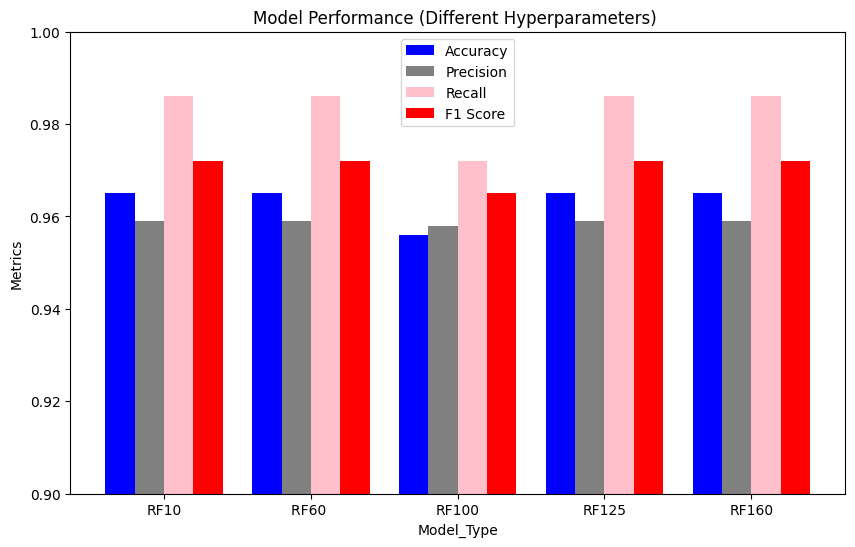

In [13]:
# Model names
Model_Type = ["RF10", "RF60 ", "RF100", "RF125", "RF160"]

# Performance metrics
n_estimators = [10, 60, 100, 125, 160]
Accuracy = [0.965, 0.965, 0.956, 0.965, 0.965]
Precision = [0.959, 0.959, 0.958,0.959, 0.959]
Recall = [0.986, 0.986, 0.972,0.986, 0.986]
F1_score_values = [0.972, 0.972,0.965 ,0.972, 0.972]

# Size of figure
plt.figure(figsize=(10, 6))

# Bar positions
x = np.arange(len(Model_Type))

# Plot bars for each metric
plt.bar(x - 0.2*1.5, Accuracy, width=0.2, label="Accuracy", color="blue")
plt.bar(x - 0.2/2, Precision, width=0.2, label="Precision", color="GREY")
plt.bar(x + 0.2/2, Recall, width=0.2, label="Recall", color="pink")
plt.bar(x + 0.2*1.5, F1_score_values, width=0.2, label="F1 Score", color="red")

# Add labels and title
plt.xlabel("Model_Type")
plt.ylabel("Metrics")
plt.title("Model Performance (Different Hyperparameters) ")
plt.xticks(ticks=x, labels=Model_Type)
plt.ylim(0.9, 1.0)  # Set y-axis limit for better visibility
plt.legend()

# Show plot
plt.show()